# **Prediction of Hadron and Gamma Particles**
Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

*Reading the CSV file and adding column names since the data does not have any. We will use the column names as given on the dataset website.*

# **Dataset**
Link: http://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

# **Aim**
*We have 10 features for every particle, and we need to predict whether a future particle value will be a Gamma Particle or a Hadron Particle using Supervised Machine Learning.*

Assigning names to feature vector values by finding the attributes of the data from the Dataset documentation

In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Converting target class values to numerical

In [ ]:
df["class"] = (df['class'] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
for label in cols:
  plt.hist(df[df['class']==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
  plt.hist(df[df['class']==0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

NameError: name 'cols' is not defined

In [ ]:
sns.pairplot(df, vars=cols, hue="class")
plt.legend(loc='upper right')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e88827218a0> (for post_execute):


KeyboardInterrupt: 

# Splitting Data (Train, Validate, Test)

In [ ]:
df_shuffled = df.sample(frac = 1, random_state=64)

size = len(df_shuffled)
train_end = int(0.6 * size)
val_end = int(0.8 * size)

train_set = df_shuffled[ : train_end]
val_set = df_shuffled[train_end : val_end]
test_set = df_shuffled[val_end : ]

# Normalizing Feature Vectors
There is a significant value difference in the feature vectors so for fixing it we will normalize the data values.

Also if we look here, there is a significant difference in the vectors that are Gamma particles and Hadron particles. This will surely create a bias in the model. To fix this, we will use RandomOverSampler from imblearn to create some random sample datasets and combine them to our training dataset to minimize the bias during training

In [ ]:
print("Gamma:",len(train_set[train_set['class']==1]))
print("Hadron:",len(train_set[train_set['class']==0]))

Gamma: 7409
Hadron: 4003


In [ ]:
def scaleDataset(dataFrame, oversample = False):
  # Split the columns
  x = dataFrame[dataFrame.columns[:-1]]      # These are the features
  y = dataFrame[dataFrame.columns[-1]]       # Thes are labels i.e Gamma or Hadron

  scaler = StandardScaler()
  x = scaler.fit_transform(x)                # Normalize the feature values

  if oversample:                             # Take the less class and then use R.O.S. to create more instances
    ROS = RandomOverSampler(random_state=64)
    x,y = ROS.fit_resample(x,y)

  data = np.column_stack((x,y))             # Stack the columns that we've split to form new train_set

  return data, x, y

In [ ]:
train_set, x_train, y_train = scaleDataset(train_set, oversample=True)
val_set, x_val, y_val = scaleDataset(val_set, oversample=False)
test_set, x_test, y_test = scaleDataset(test_set, oversample=False)

# **Applying k-nearest neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn_model.fit(x_train, y_train)

Make predictions on the trained model

In [ ]:
y_predictions = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1310
           1       0.86      0.86      0.86      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes' Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
# We will check the correlation of the predicted values with test values
y_predictions = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1310
           1       0.74      0.90      0.81      2494

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(x_train, y_train)

In [ ]:
y_preditctions = lr_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1310
           1       0.74      0.90      0.81      2494

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Support Vector Machines (S.V.M.)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)

In [ ]:
svc_predctions = svc_model.predict(x_test)

In [ ]:
print(classification_report(y_test, svc_predctions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1310
           1       0.89      0.90      0.89      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Artificial Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def plot_lossANDaccuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))      # Plot a subplot of grid 1x2
    """
    Plot training & validation loss curves produced by
    model.fit(..., validation_data=..., ...)
    """
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary cross‑entropy')
    ax1.legend()
    ax1.grid(True)

    """
    Plot training & validation accuracy curves.
    """
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [ ]:
# Nural Network of 10 input neurons and 1 output neuron
# And 32 neurons each in 2 hidden layers with 0 dropout probability
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu',),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = nn_model.fit(
    x_train, y_train, epochs=100, batch_size = 32, validation_split = 0.2
)

Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8866 - loss: 0.2648 - val_accuracy: 0.7777 - val_loss: 0.4236
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8942 - loss: 0.2575 - val_accuracy: 0.8296 - val_loss: 0.3380
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8958 - loss: 0.2510 - val_accuracy: 0.8094 - val_loss: 0.3652
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8916 - loss: 0.2620 - val_accuracy: 0.8279 - val_loss: 0.3433
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8939 - loss: 0.2591 - val_accuracy: 0.7905 - val_loss: 0.3887
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8963 - loss: 0.2501 - val_accuracy: 0.8580 - val_loss: 0.2756
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8922 - loss: 0.2568 - val_accuracy: 0.8141 - val_loss: 0.3642
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8929 - loss: 0.2534 - val_accu

In [ ]:
# History returns a dictonary with key values written below
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


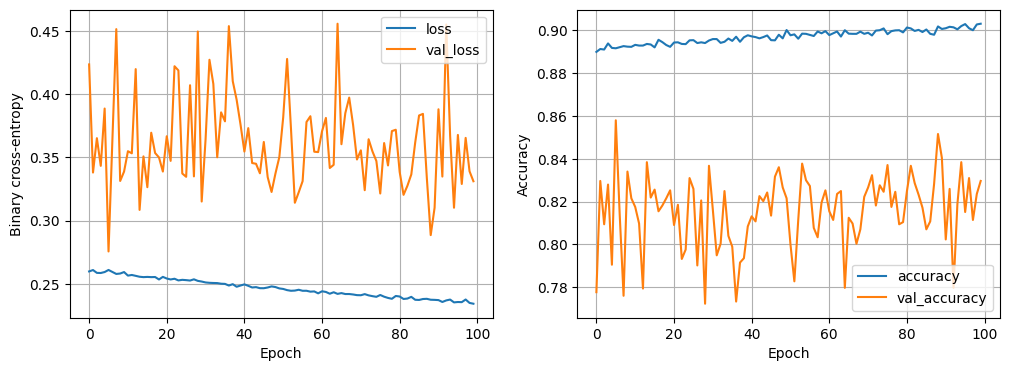

In [ ]:
plot_lossANDaccuracy(history)

# Smarter Way of training Neural Networks

In [ ]:
from re import VERBOSE

def train_model(x_train, y_train, num_nodes, dropout_prob, learn_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.Input(shape=(10,)),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learn_rate), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

# Trying Multiple Models to find the best fit

Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 32


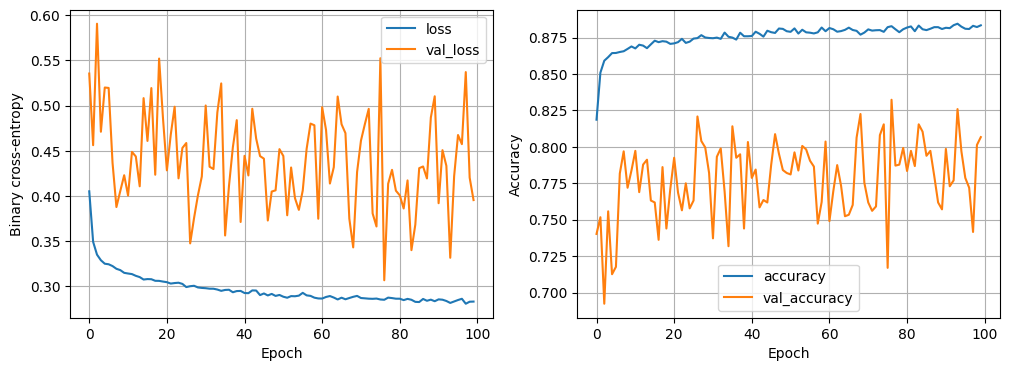

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3101
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 64


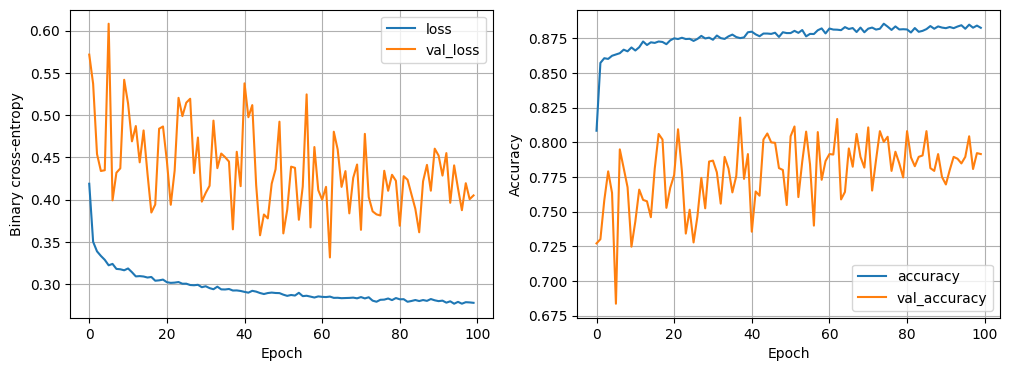

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3154
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 128


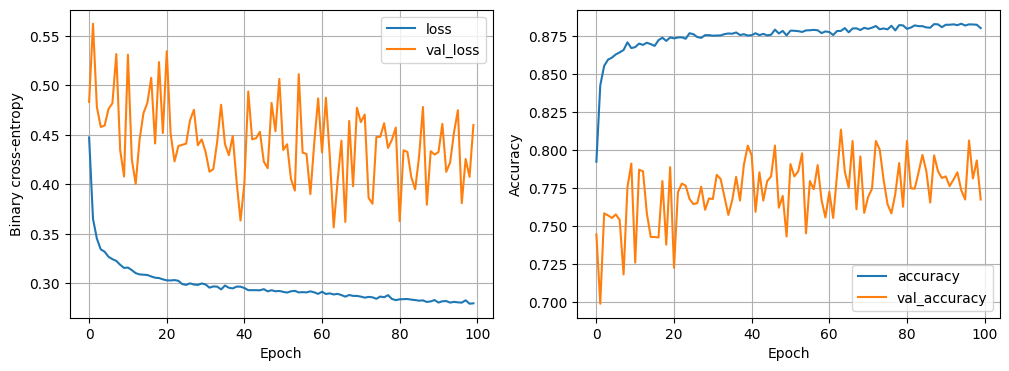

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3196
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 32


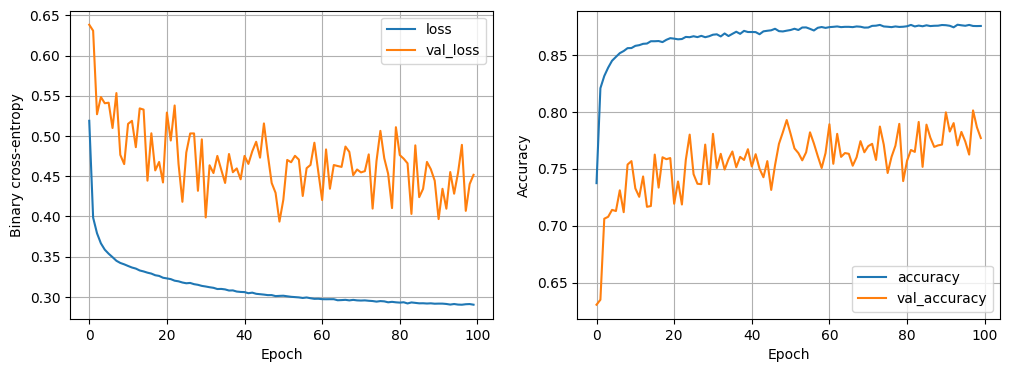

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8655 - loss: 0.3153
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 64


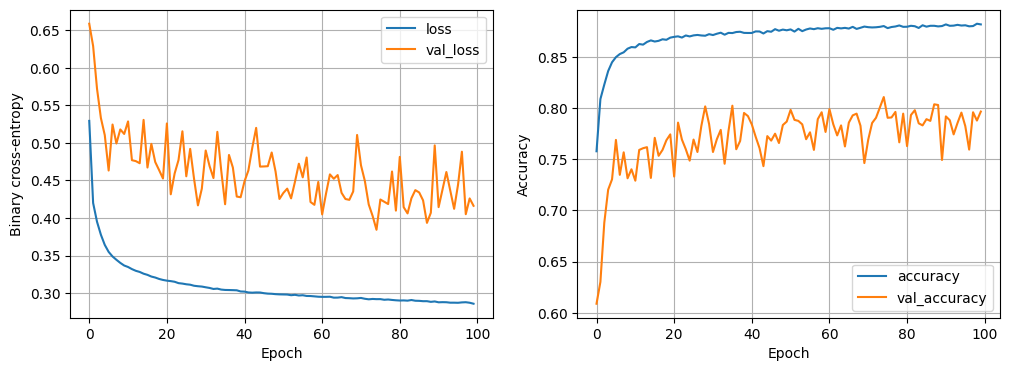

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8695 - loss: 0.3120
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 128


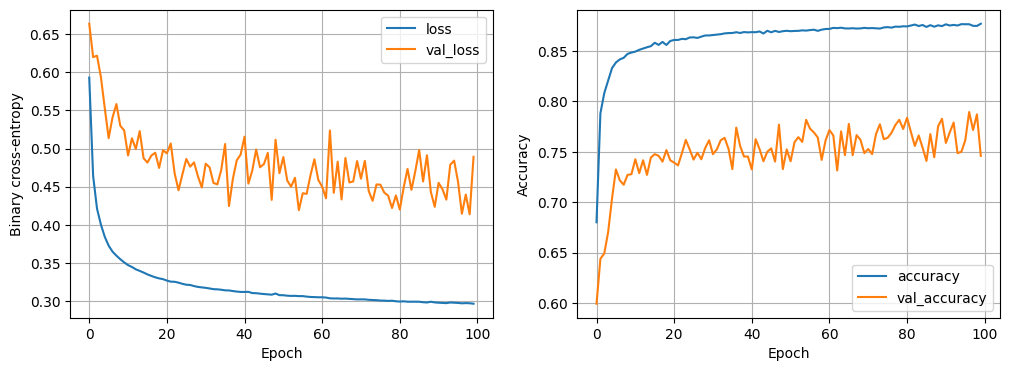

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3196
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 32


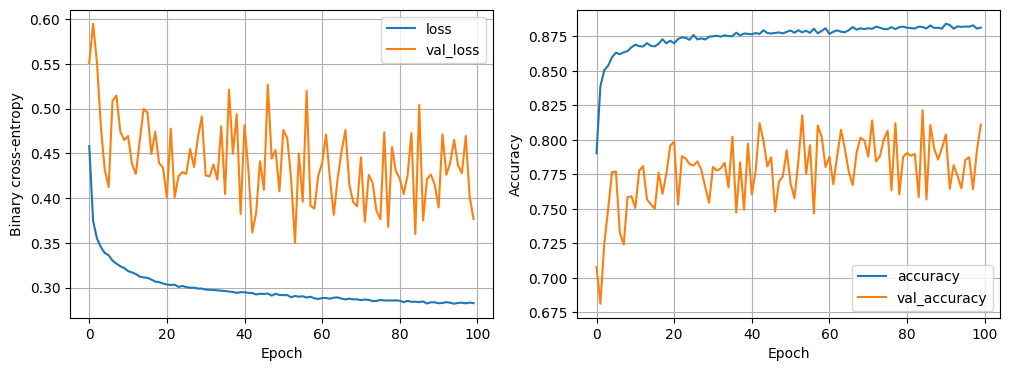

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3126
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 64


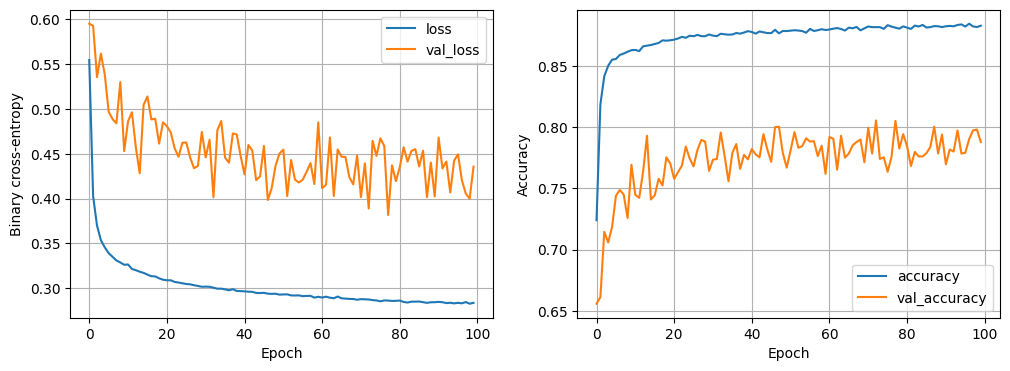

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3051
Nodes: 16, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 128


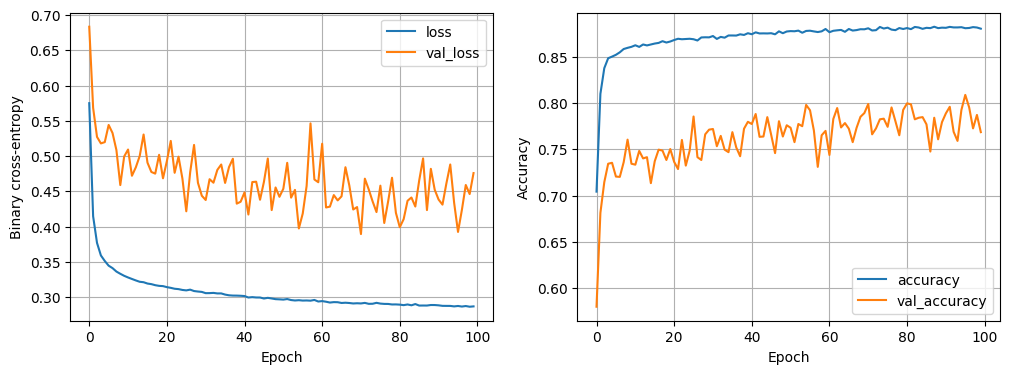

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3149
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 32


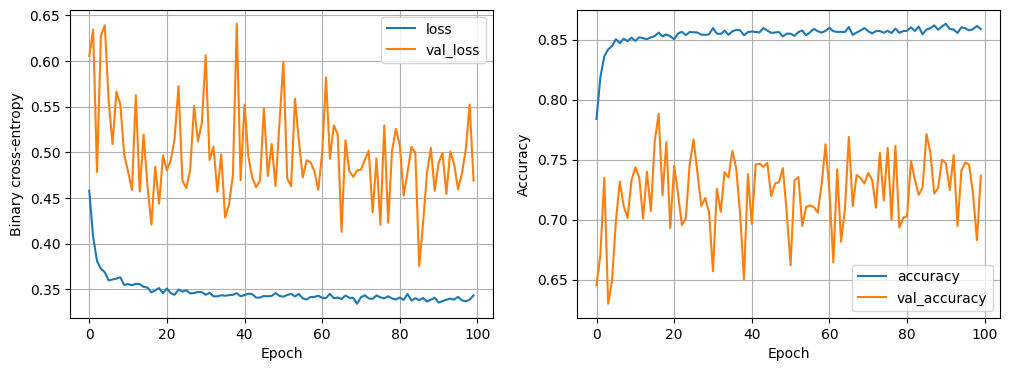

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3143
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 64


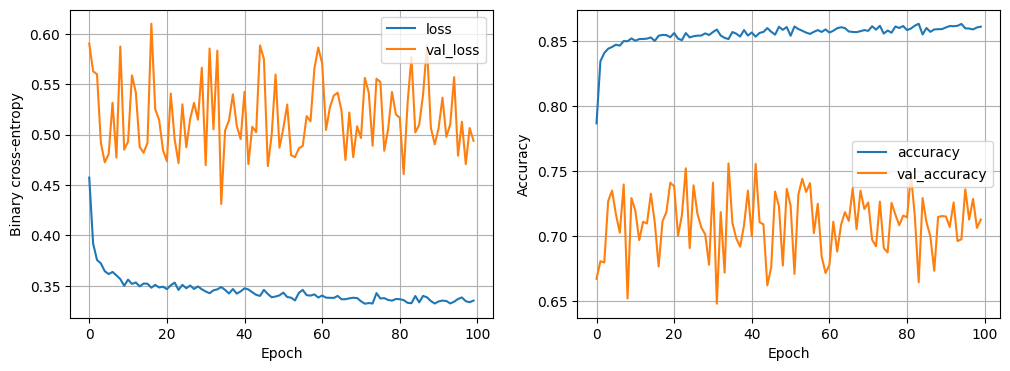

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3210
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 128


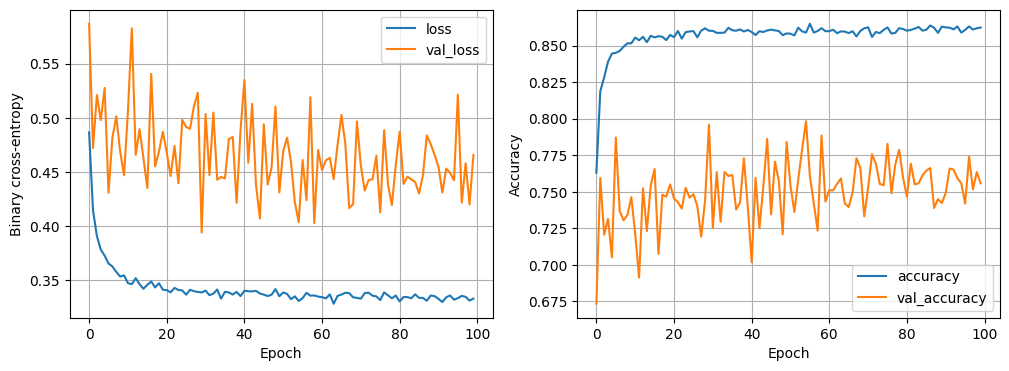

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8712 - loss: 0.3138
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 32


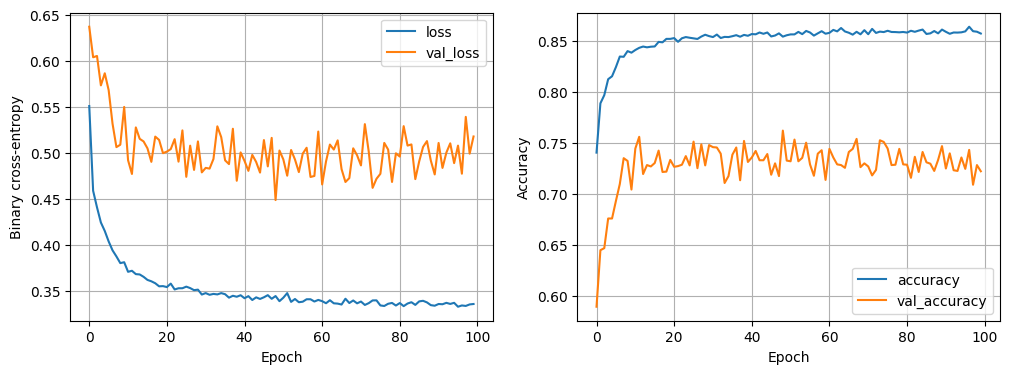

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3152
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 64


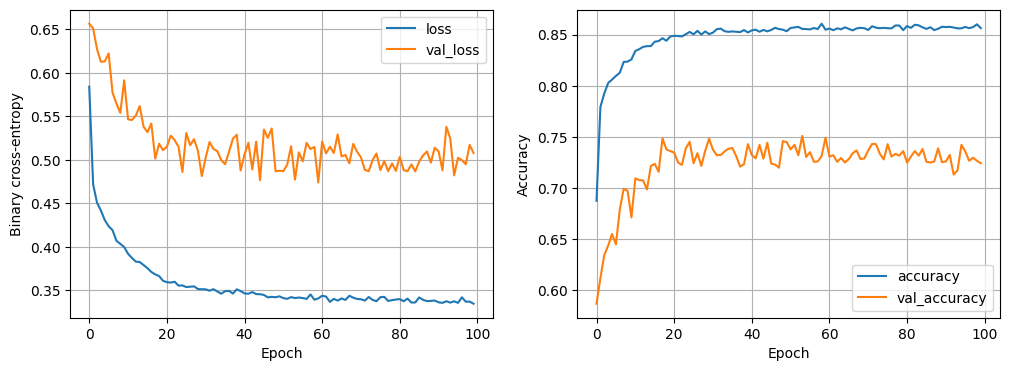

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3150
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 128


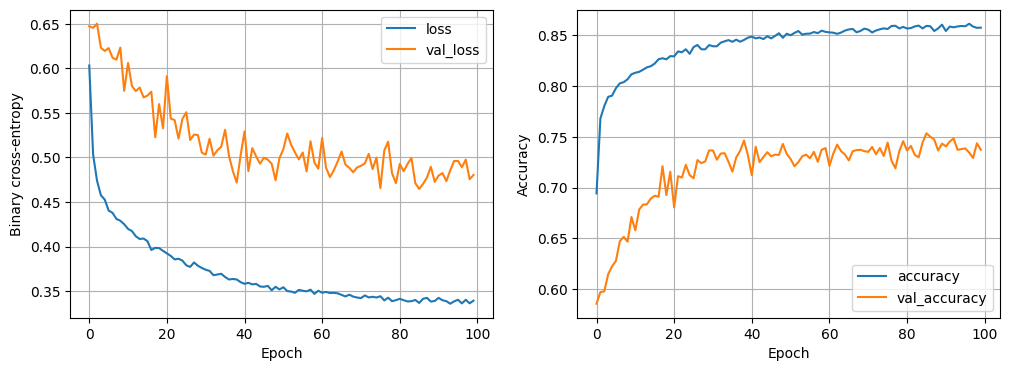

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3173
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 32


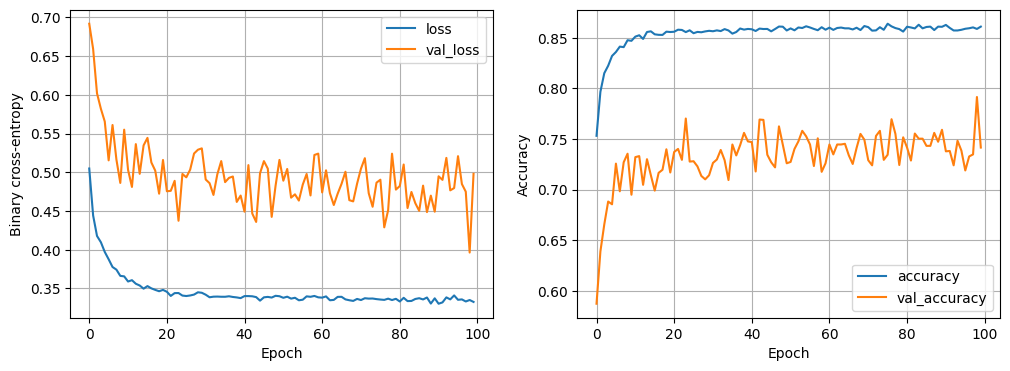

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3170
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 64


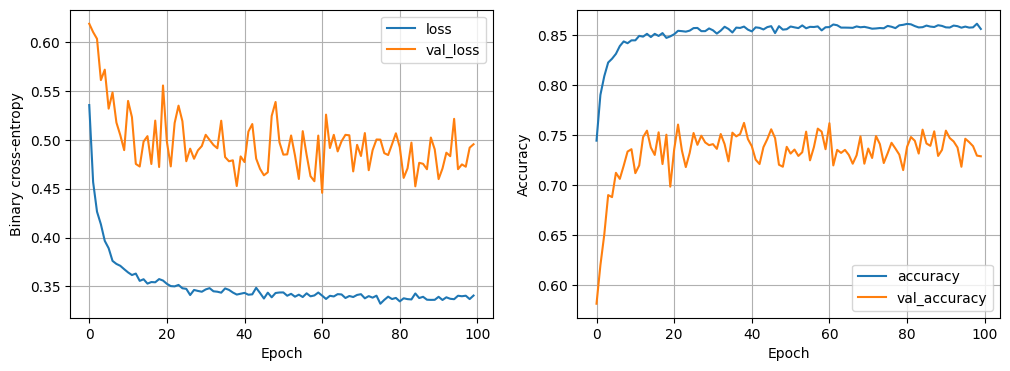

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3205
Nodes: 16, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 128


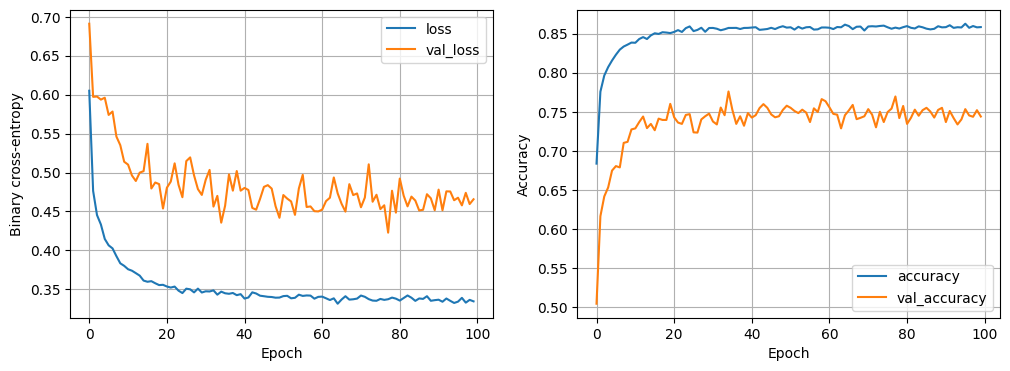

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3173
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 32


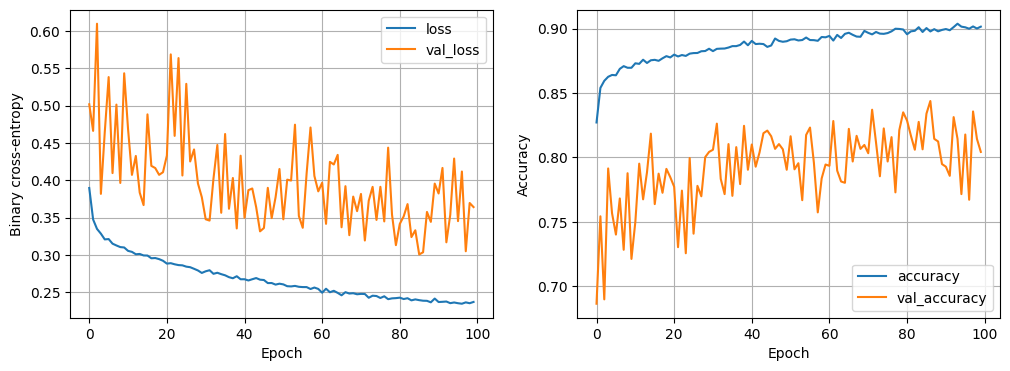

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3809
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 64


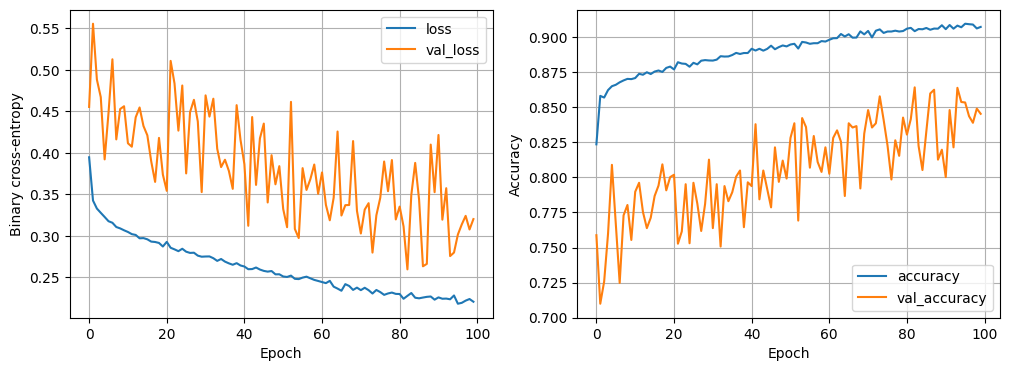

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3870
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 128


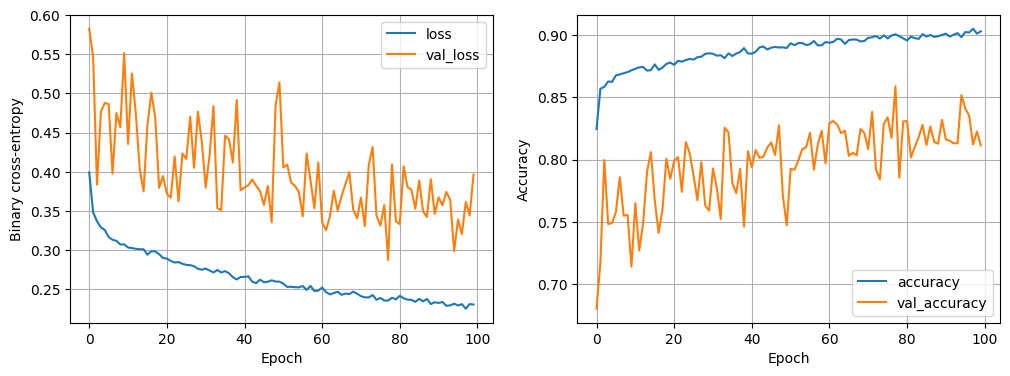

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.4133
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 32


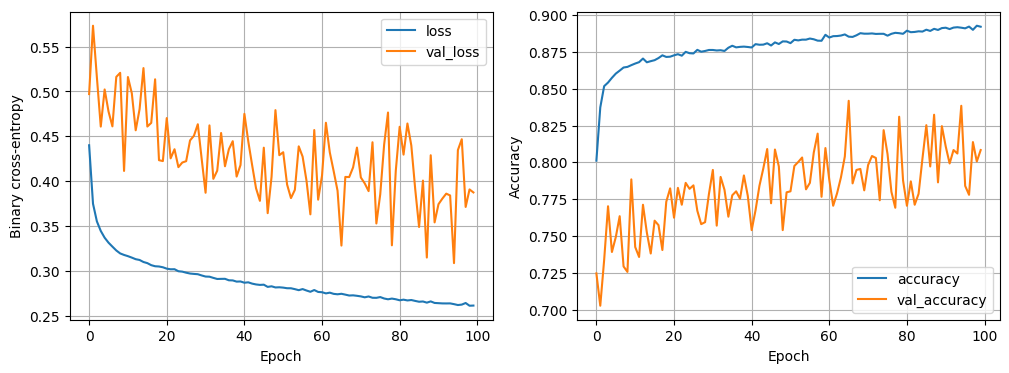

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3169
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 64


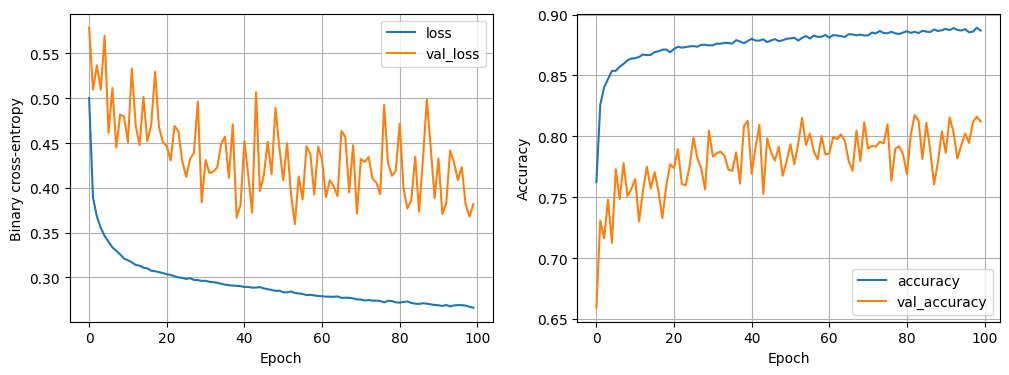

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3162
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 128


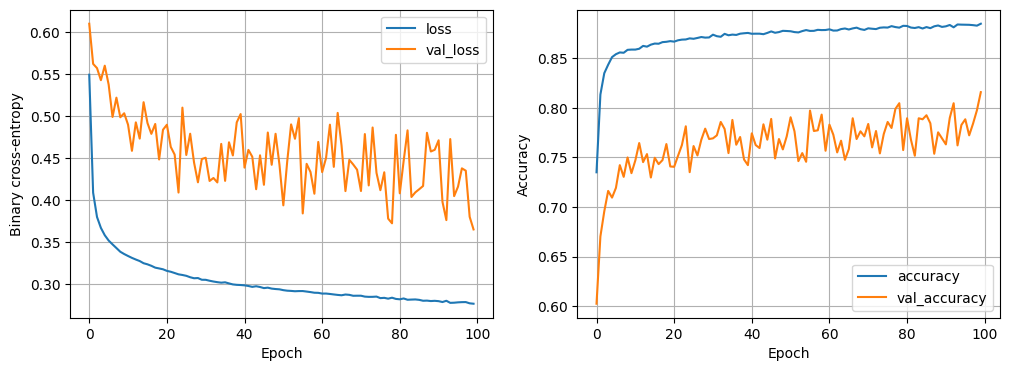

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.3132
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 32


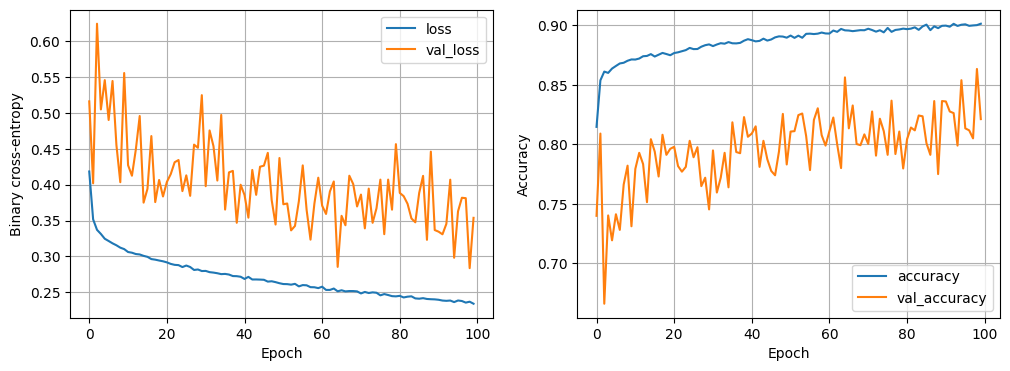

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.3388
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 64


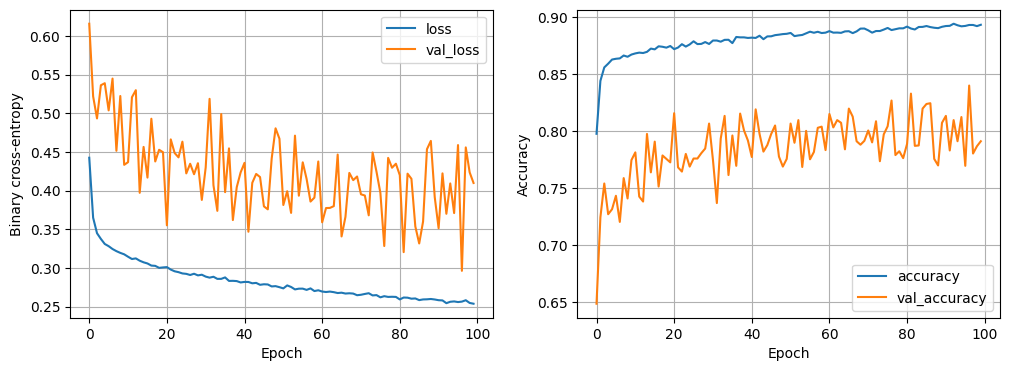

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3368
Nodes: 32, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 128


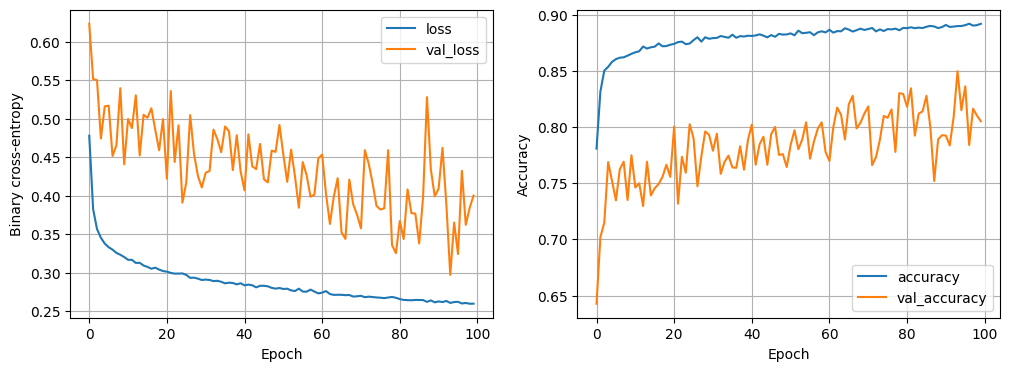

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3189
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 32


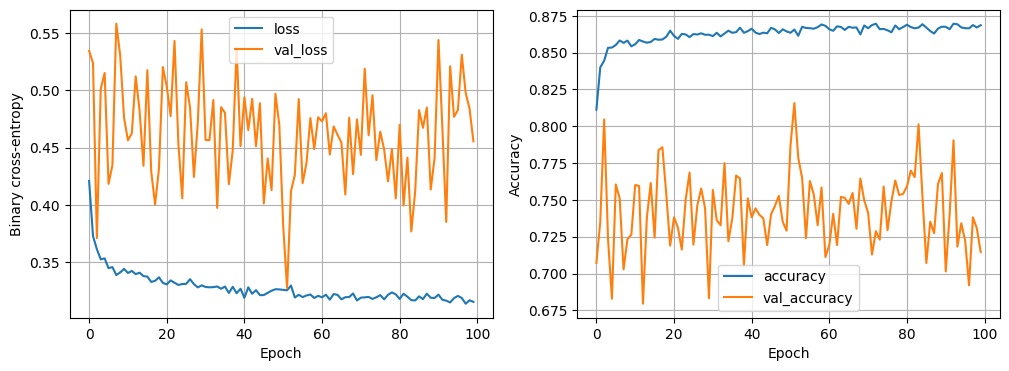

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3314
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 64


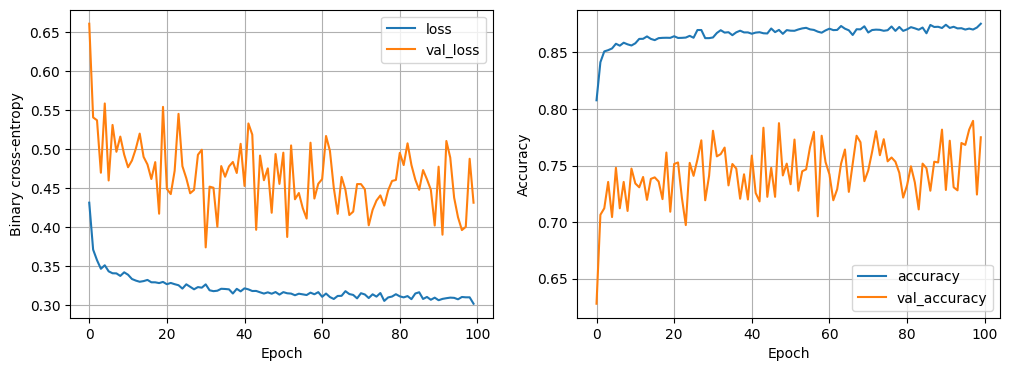

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3159
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 128


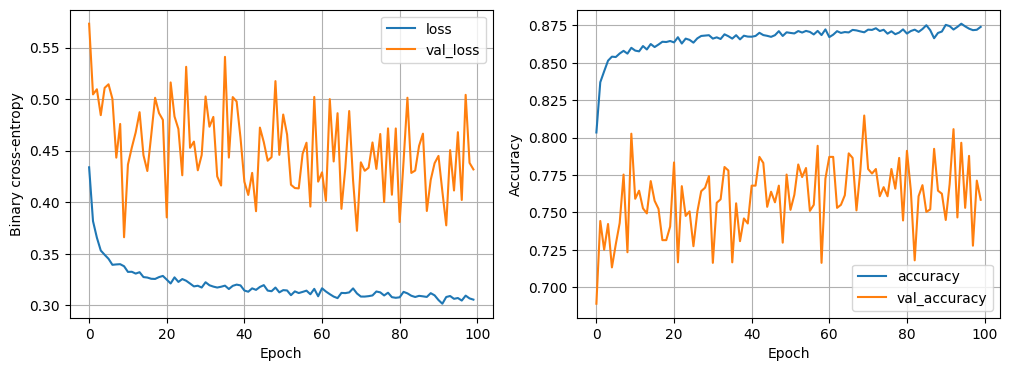

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3062
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 32


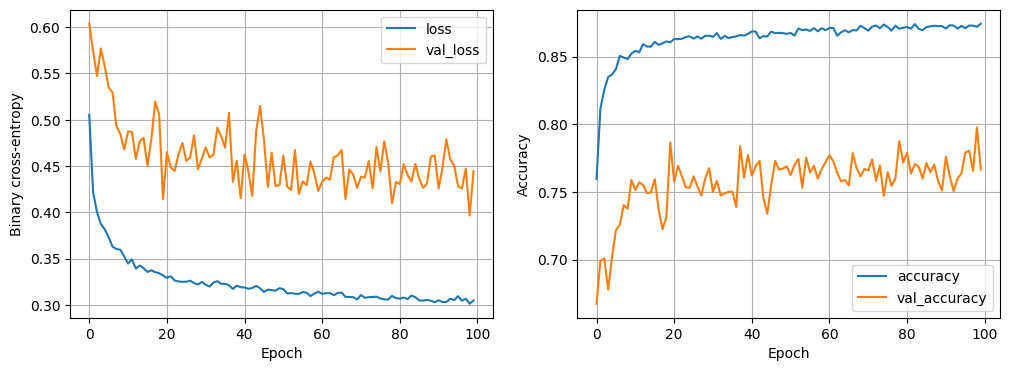

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.2998
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 64


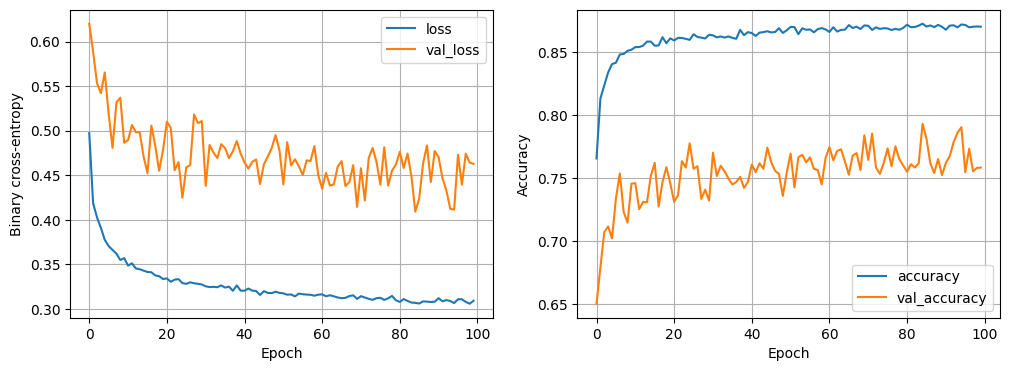

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.2998
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 128


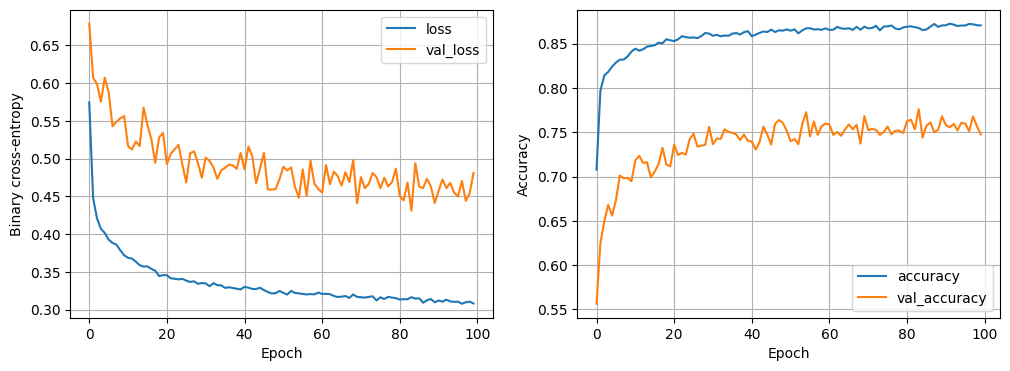

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8684 - loss: 0.3021
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 32


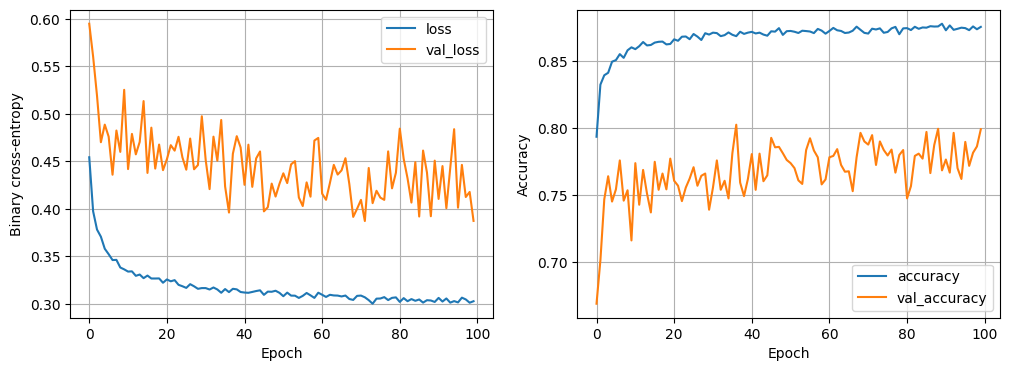

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3044
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 64


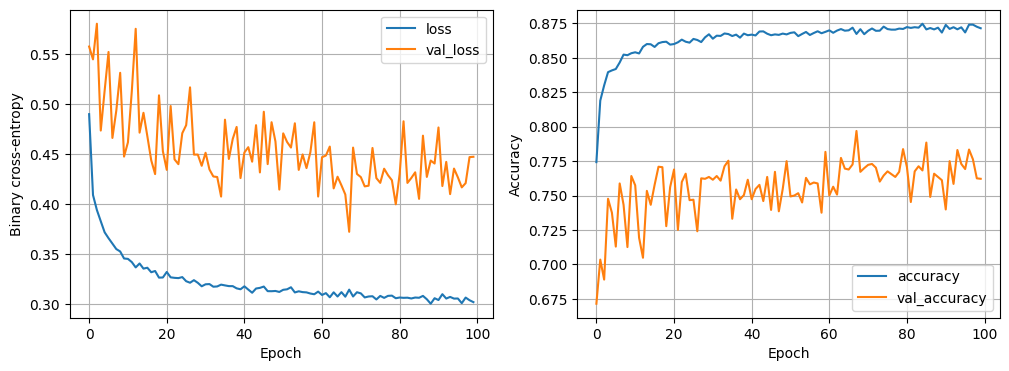

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3104
Nodes: 32, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 128


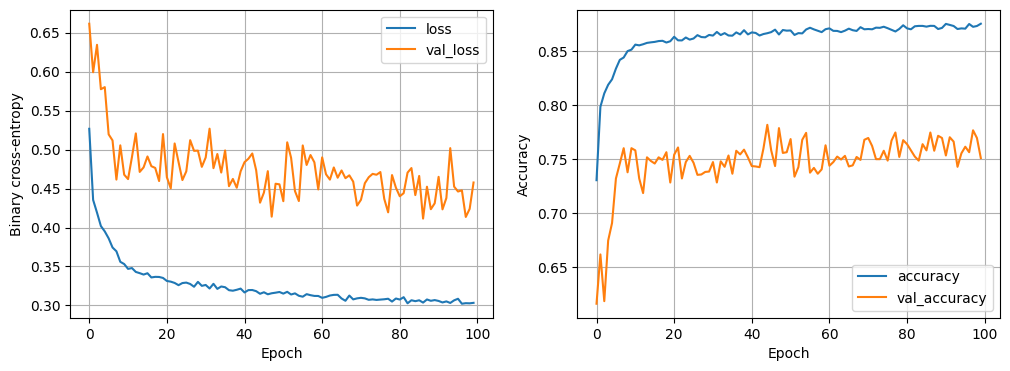

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8677 - loss: 0.3052
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 32


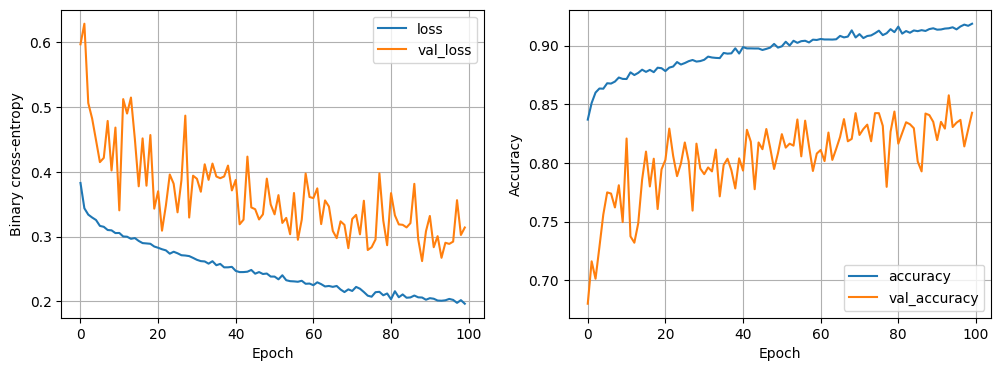

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.4938
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 64


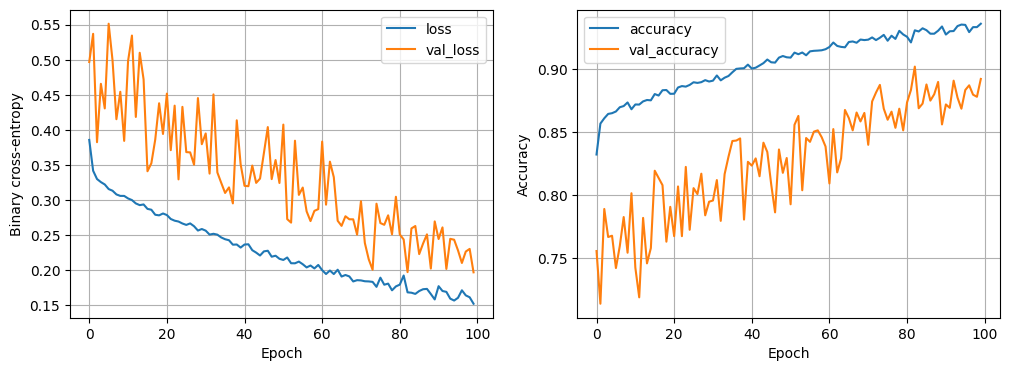

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.5629
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.01, Batch Size: 128


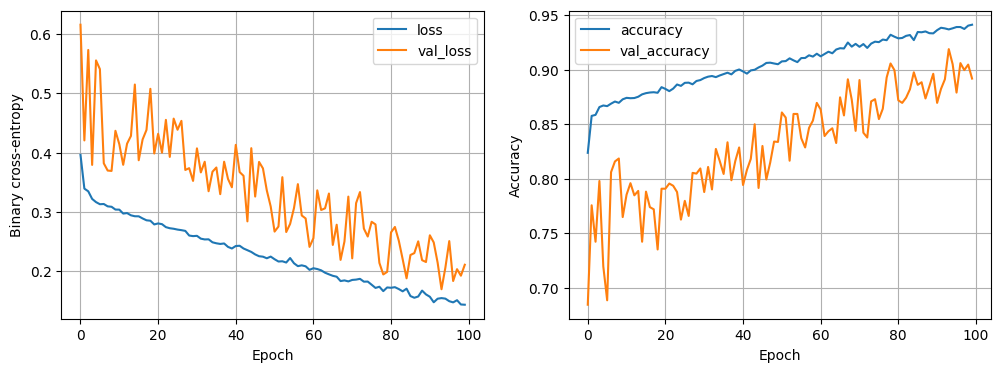

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8482 - loss: 0.5956
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 32


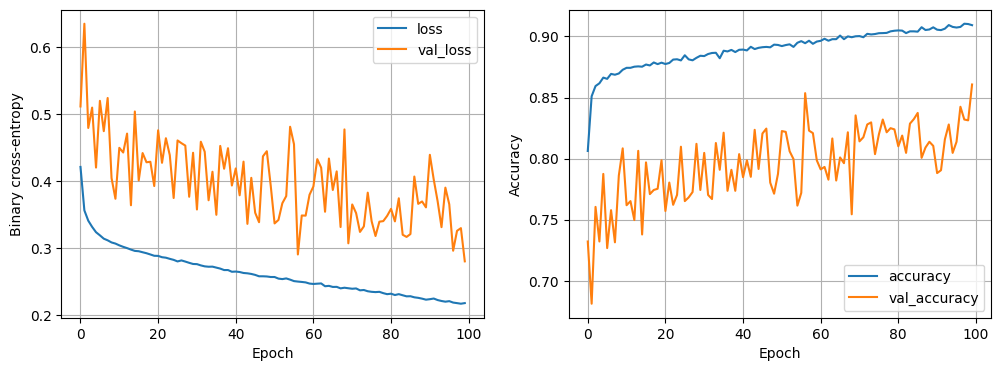

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3441
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 64


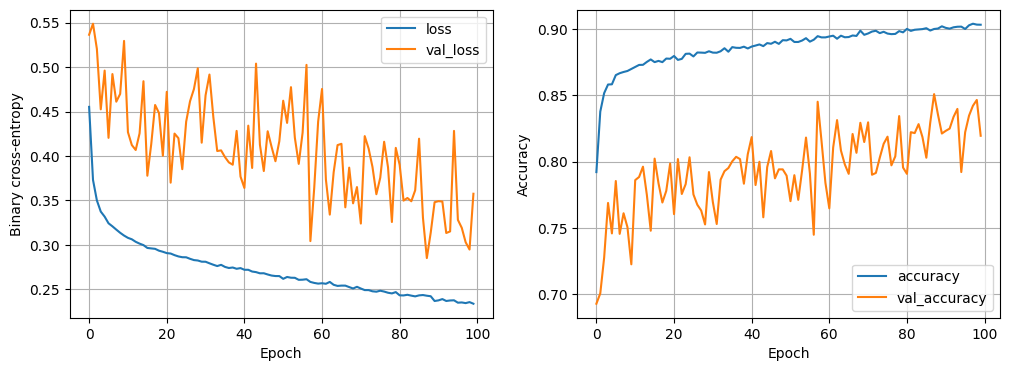

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8659 - loss: 0.3260
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.001, Batch Size: 128


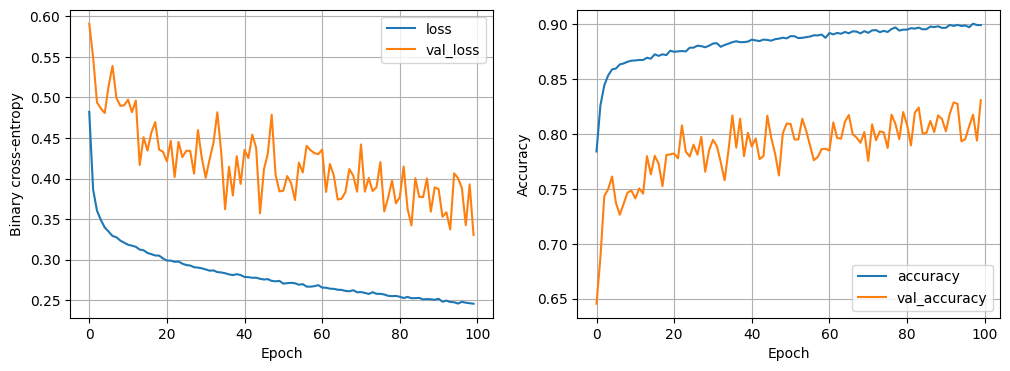

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.3215
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 32


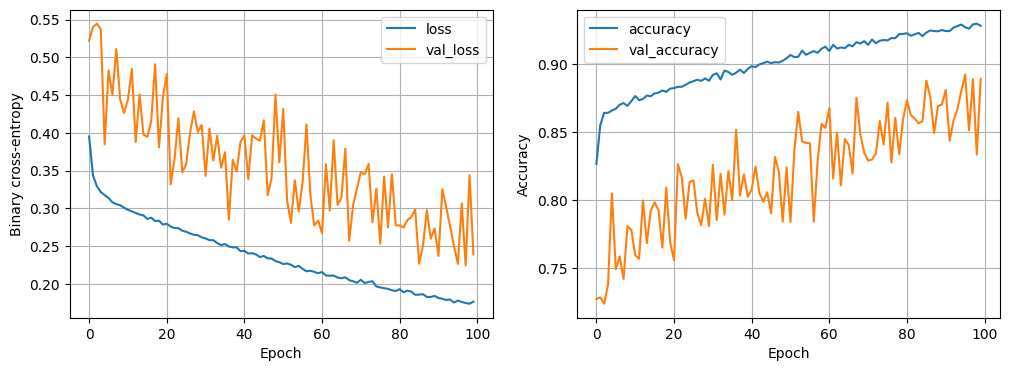

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8575 - loss: 0.3998
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 64


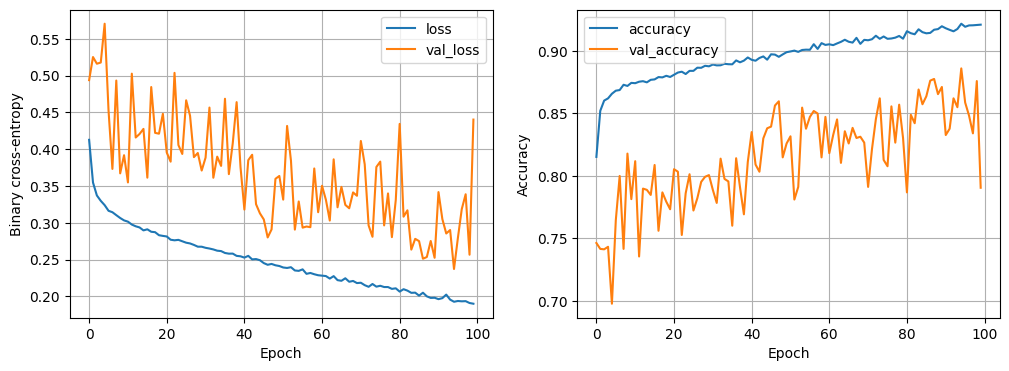

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8641 - loss: 0.3865
Nodes: 64, Dropout_Prob: 0, Learning Rate: 0.002, Batch Size: 128


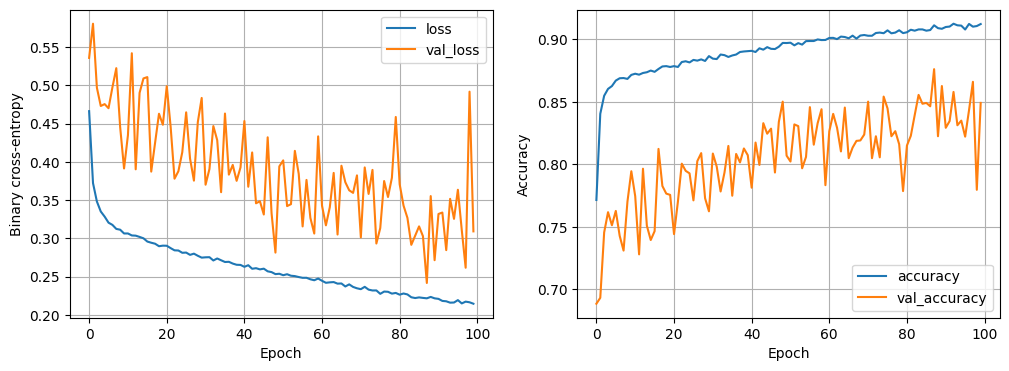

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.3373
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 32


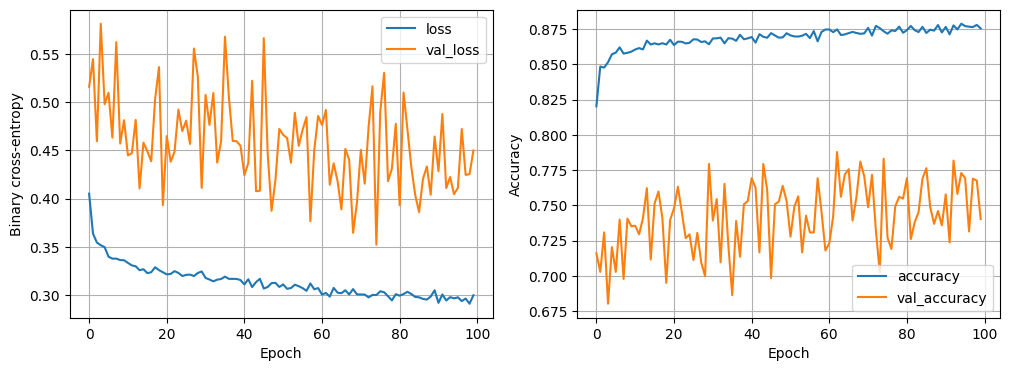

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.3172
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 64


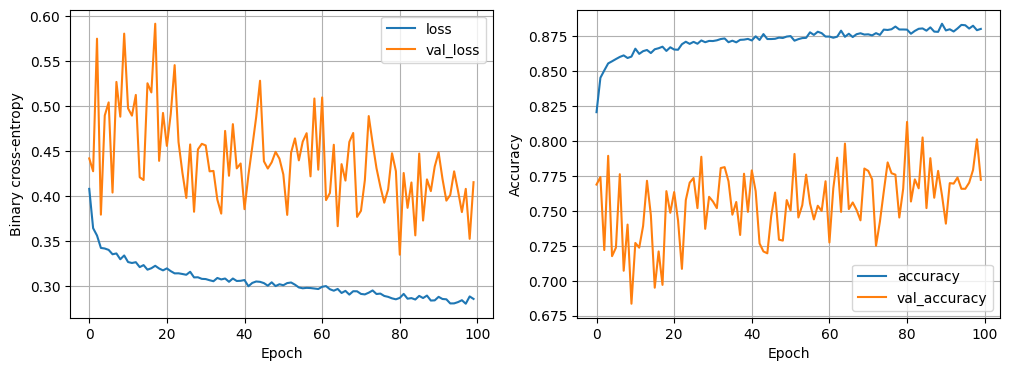

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3204
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.01, Batch Size: 128


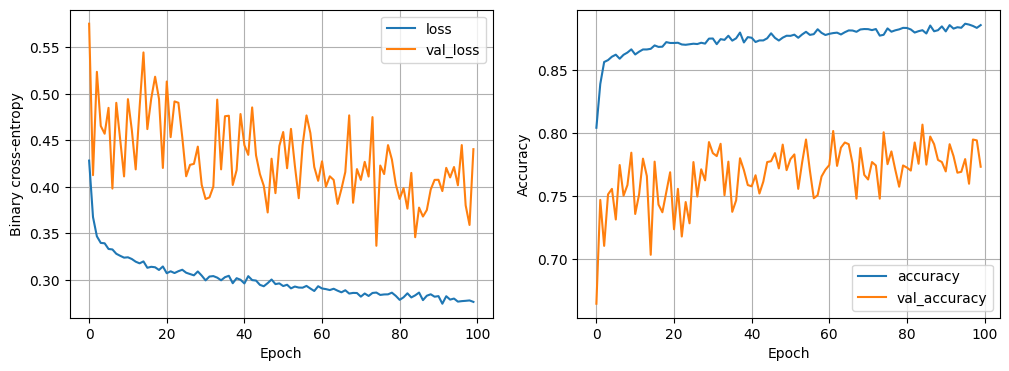

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8715 - loss: 0.3136
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 32


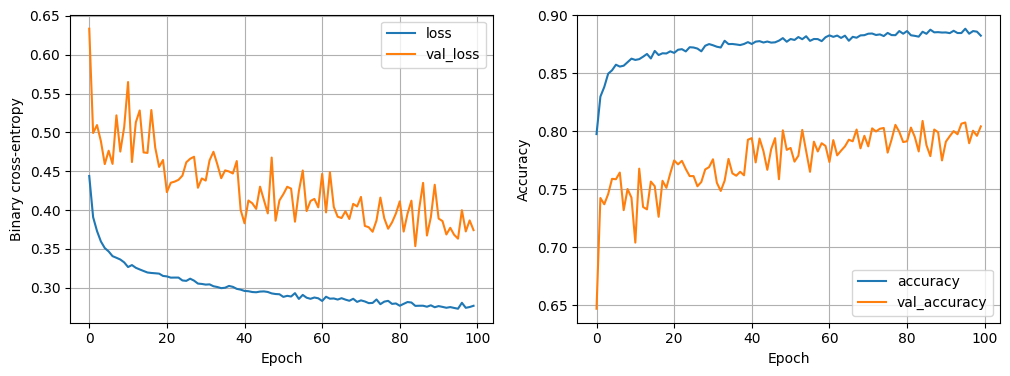

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8772 - loss: 0.3001
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 64


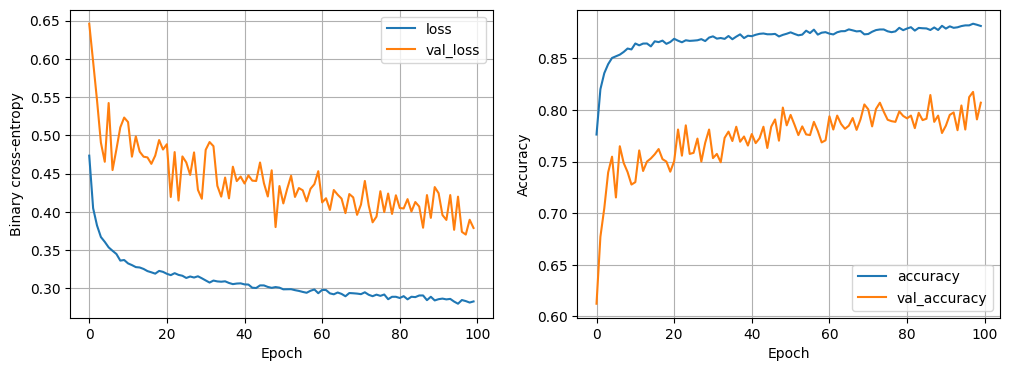

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.2981
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.001, Batch Size: 128


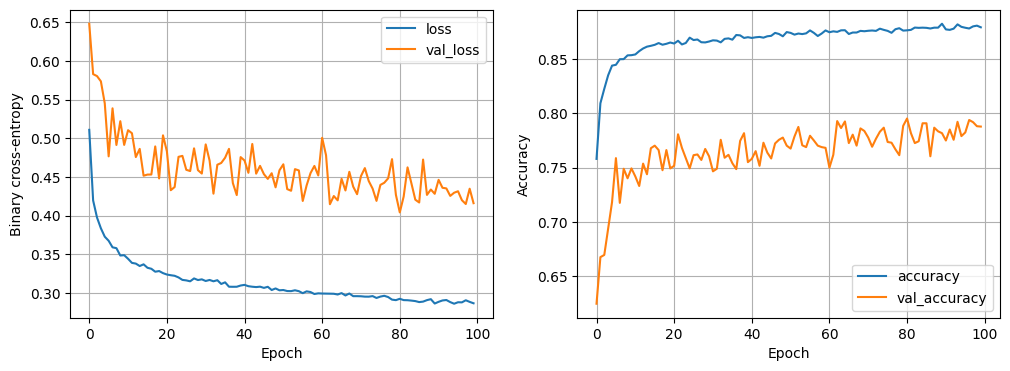

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8731 - loss: 0.2926
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 32


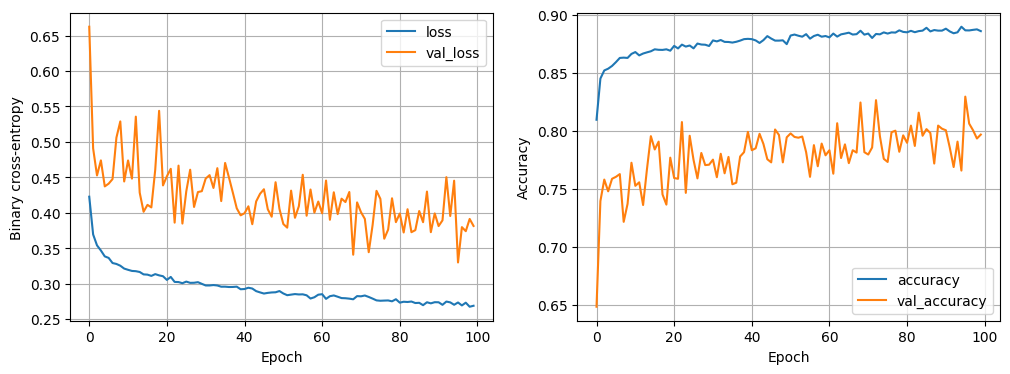

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3001
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 64


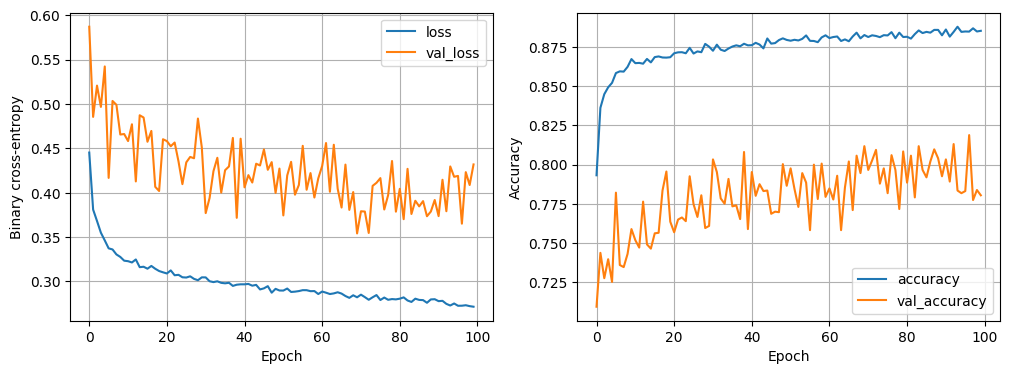

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8731 - loss: 0.3008
Nodes: 64, Dropout_Prob: 0.2, Learning Rate: 0.002, Batch Size: 128


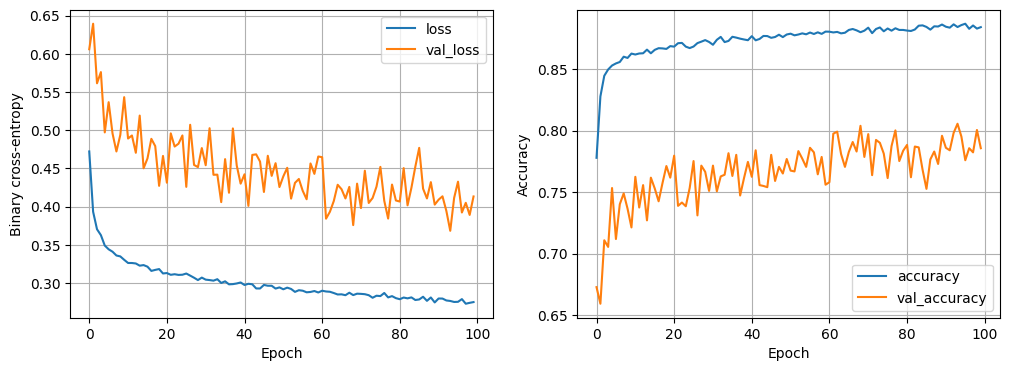

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.2989


In [ ]:
min_val_loss = float('inf')
min_val_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.01, 0.001, 0.002]:
      for batch_size in [32, 64, 128]:
        print(f"Nodes: {num_nodes}, Dropout_Prob: {dropout_prob}, Learning Rate: {learning_rate}, Batch Size: {batch_size}")
        nn_model, history = train_model(x_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        plot_lossANDaccuracy(history)
        val_loss = nn_model.evaluate(x_val, y_val)[0]   #Keras gives a list so comparing with first element
        if(val_loss < min_val_loss):
          min_val_loss = val_loss
          min_val_loss_model = nn_model

Now we will take our least loss model and then use it to predict values for x_test and compare it with y_test

In [ ]:
y_pred = min_val_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape((-1, ))

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1126
           1       0.94      0.88      0.91      2678

    accuracy                           0.87      3804
   macro avg       0.84      0.87      0.86      3804
weighted avg       0.88      0.87      0.88      3804

